## Final Project Submission

Please fill out:
* Student name: Vinayak Modgil
* Student pace: self paced / part time / full time : full time
* Scheduled project review date/time: TBD
* Instructor name: James Irving
* Blog post URL:


## Table of Contents
- **[INTRODUCTION](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)<br>**
- **[SCRUB](#SCRUB)<br>**
- **[Explore](#Explore)<br>**
- **[Modeling](#Modeling)<br>**
- **[Interpret](#Interpret)<br>**

## INTRODUCTION

### Business Problem
Potential real estate tycoons are looking to purchase houses so that they can sell it out to future house owners. You are equipped with the data and you need to advise the stakeholders on the affect of different parameters that affect the value of houses in the King County.

## OBTAIN
Data Understanding:

Questions to consider:

- What are the business's pain points related to this project?
- How did you pick the data analysis question(s) that you did?
- Why are these questions important from a business perspective?

### Importing Libraries

In [4611]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import scipy.stats as stats
plt.style.use("seaborn")

### Importing Dataset

In [4612]:
df = pd.read_csv("data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## SCRUB

### Data Cleaning

In [4613]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4614]:
from sklearn.impute import SimpleImputer
## Use imputer variable to clean features
imputer = SimpleImputer(missing_values = np.NaN, strategy="most_frequent")

In [4615]:
df["yr_renovated"] = imputer.fit_transform(df["yr_renovated"].values.reshape(-1, 1))[:, 0]
df["yr_renovated"].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [4616]:
df["view"] = imputer.fit_transform(df["view"].values.reshape(-1, 1))[:, 0]
df["view"].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [4617]:
df["waterfront"] = imputer.fit_transform(df["waterfront"].values.reshape(-1, 1))[:, 0]
df["waterfront"].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [4618]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4619]:
df["sqft_basement"] = df["sqft_basement"].map(lambda x: x.replace("?", "0.0"))

### Feature Engineering

In [4620]:
df["large_home"] = df["bedrooms"] > 5
df["large_home"].value_counts()

False    21263
True       334
Name: large_home, dtype: int64

In [4621]:
latlong = df[["lat", "long"]]
latlong

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045
...,...,...
21592,47.6993,-122.346
21593,47.5107,-122.362
21594,47.5944,-122.299
21595,47.5345,-122.069


In [4622]:
df["how_old"] = abs(df["yr_built"] - 2015)
df["how_old"].value_counts()

1      559
9      453
10     450
11     433
12     420
      ... 
82      30
114     29
113     27
80      24
81      21
Name: how_old, Length: 116, dtype: int64

In [4623]:
df["renovated"] = df["yr_renovated"] != 0
df["renovated"].value_counts()

False    20853
True       744
Name: renovated, dtype: int64

In [4722]:
df["has_basement"] = df["sqft_basement"] != 0.0
df["has_basement"].value_counts()

False    13280
True      8317
Name: has_basement, dtype: int64

In [4723]:
df["sqft_living_comparison"] = df["sqft_living"] > df["sqft_living15"]

In [4724]:
df["sqft_basement"] = df["sqft_basement"].astype("float64")
df["view"] = df["view"].astype("int64")
df["floors"] = df["floors"].astype("int64")
df["waterfront"] = df["waterfront"].astype("int64")
df["renovated"] = df["renovated"].astype("int64")
df["large_home"] = df["large_home"].astype("int64")
df["sqft_living_comparison"] = df["sqft_living_comparison"].astype("int64")

In [4725]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,large_home,how_old,renovated,has_basement,sqft_living_comparison,price
0,7129300520,10/13/2014,3,1.00,1180,5650,1,0,0,3,...,47.5112,-122.257,1340,5650,0,60,0,False,0,221900.0
1,6414100192,12/9/2014,3,2.25,2570,7242,2,0,0,3,...,47.7210,-122.319,1690,7639,0,64,1,True,1,538000.0
2,5631500400,2/25/2015,2,1.00,770,10000,1,0,0,3,...,47.7379,-122.233,2720,8062,0,82,0,False,0,180000.0
3,2487200875,12/9/2014,4,3.00,1960,5000,1,0,0,5,...,47.5208,-122.393,1360,5000,0,50,0,True,1,604000.0
4,1954400510,2/18/2015,3,2.00,1680,8080,1,0,0,3,...,47.6168,-122.045,1800,7503,0,28,0,False,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1530,1131,3,0,0,3,...,47.6993,-122.346,1530,1509,0,6,0,False,0,360000.0
21593,6600060120,2/23/2015,4,2.50,2310,5813,2,0,0,3,...,47.5107,-122.362,1830,7200,0,1,0,False,1,400000.0
21594,1523300141,6/23/2014,2,0.75,1020,1350,2,0,0,3,...,47.5944,-122.299,1020,2007,0,6,0,False,0,402101.0
21595,291310100,1/16/2015,3,2.50,1600,2388,2,0,0,3,...,47.5345,-122.069,1410,1287,0,11,0,False,1,400000.0


### Plotting relationships between dependent and independent variable

In [4726]:
def histogram(column):
    '''
    returns histogram of a column
    in the dataframe df
    '''
    hist = df[column].hist()
    return plt.show()

def reg(column, df = df):
    return sns.regplot(x=column, y="price", data=df)

#### Bedroom

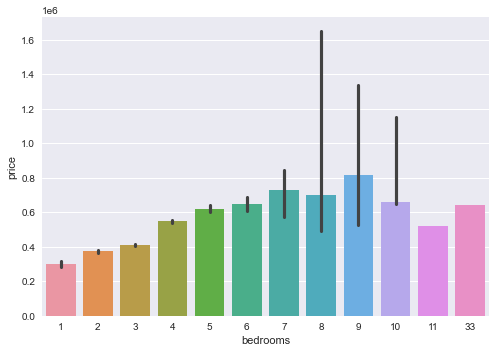

In [4727]:
sns.barplot(data=df, x="bedrooms", y="price", ci=95, estimator=np.median)
plt.show()

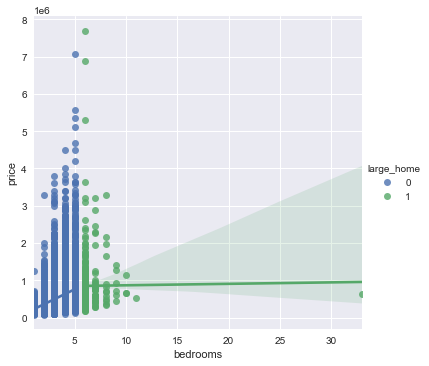

In [4728]:
sns.lmplot(x="bedrooms", y="price", hue="large_home", data=df)
plt.show()

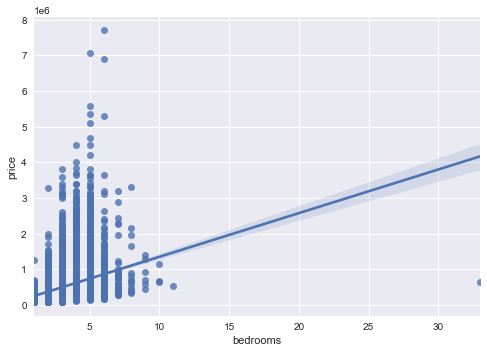

In [4729]:
reg("bedrooms", df)
plt.show()

In [4730]:
def find_outliers(data):
    """
     Detects outliers using the 1.5*IQR thresholds.
    Returns a boolean Series where True=outlier
    
    """ 
    stats = data.describe()
    q1 = stats["25%"]
    q3 = stats["75%"]
    thresh = 1.5*(q3 - q1)
    idx_outliers = (data < (q1-thresh)) | (data > (q3+thresh))
    return idx_outliers

outliers_bedrooms = find_outliers(df["bedrooms"])

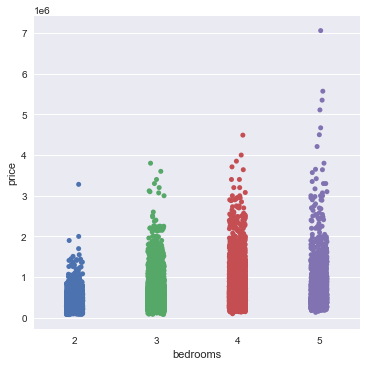

In [4731]:
sns.catplot(data=df[~outliers_bedrooms], x="bedrooms", y="price")
plt.show()

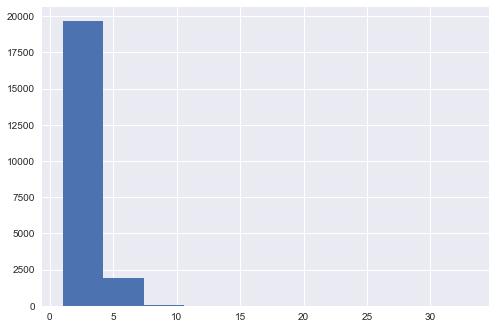

In [4732]:
histogram("bedrooms")

#### Bathroom

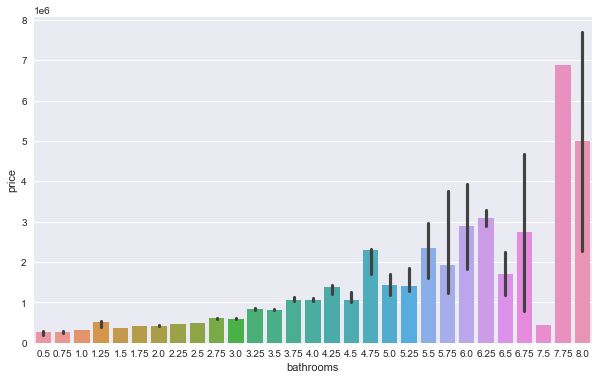

In [4733]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="bathrooms", y="price", data=df, ci=68, estimator=np.median, ax=ax)
plt.show()

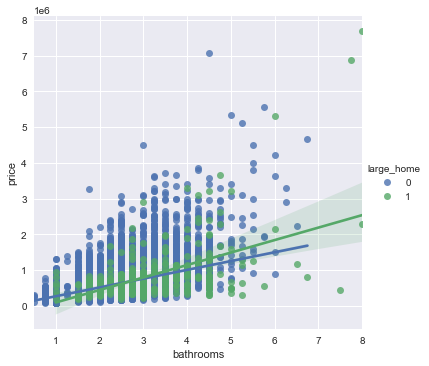

In [4734]:
sns.lmplot(x="bathrooms", y="price", data=df, hue="large_home")
plt.show()

In [4735]:
outliers_bathroom = find_outliers(df["bathrooms"])
outliers_bathroom.value_counts()

False    21036
True       561
Name: bathrooms, dtype: int64

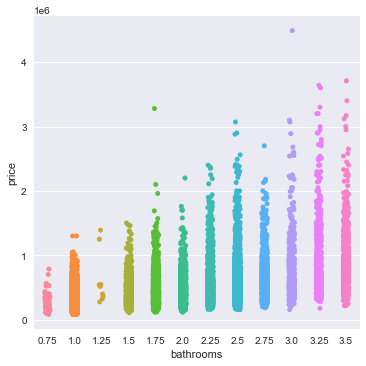

In [4736]:
sns.catplot(data=df[~outliers_bathroom], x="bathrooms", y="price")

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

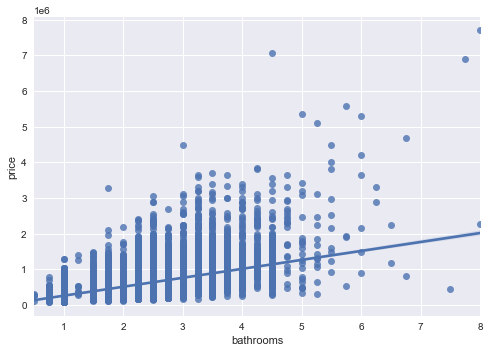

In [4737]:
reg("bathrooms")

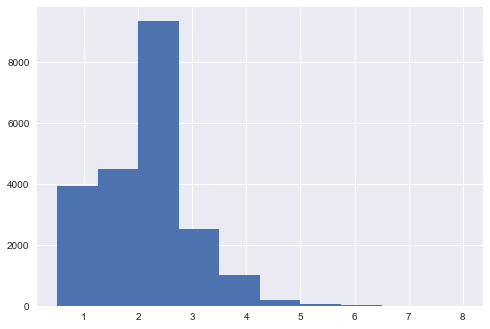

In [4738]:
histogram("bathrooms")

#### SQFT - living

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

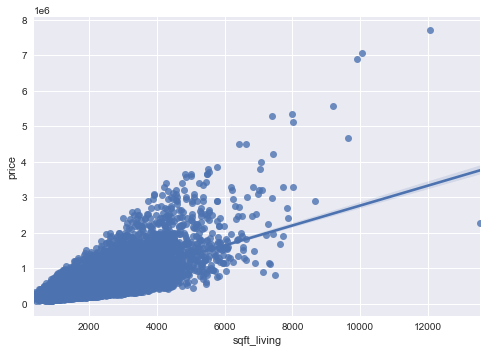

In [4739]:
reg("sqft_living")

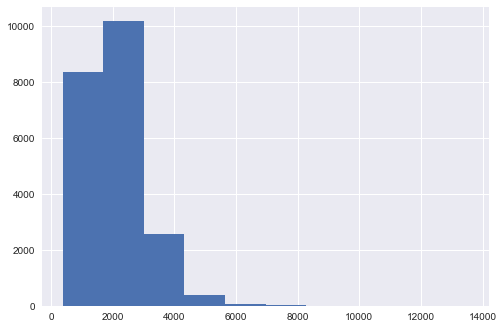

In [4740]:
histogram("sqft_living")

#### SQFT-lot

In [4741]:
def thousands(x, pos):
    return "{:1.1f}K".format(x* 1e-3)

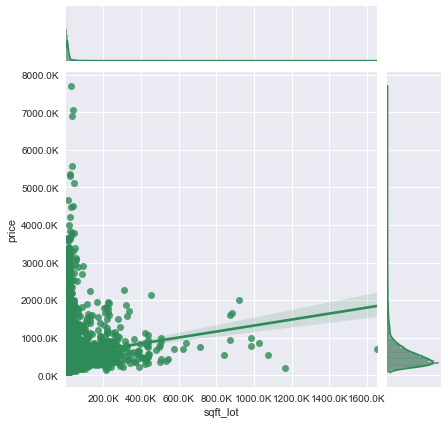

In [4742]:
fig3 = sns.jointplot(x="sqft_lot", y="price", data=df, kind="reg", color="seagreen")
fig3.ax_joint.yaxis.set_major_formatter(FuncFormatter(thousands))
fig3.ax_joint.xaxis.set_major_formatter(FuncFormatter(thousands))

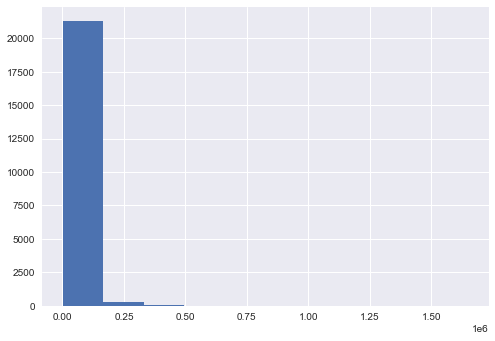

In [4743]:
histogram("sqft_lot")

#### Floors

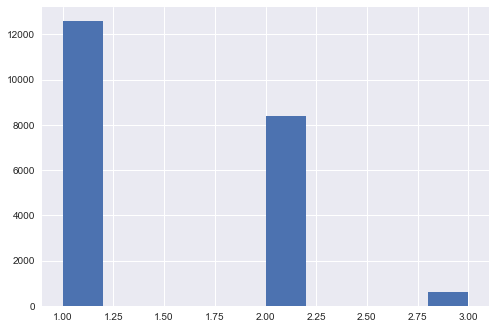

In [4744]:
histogram("floors")

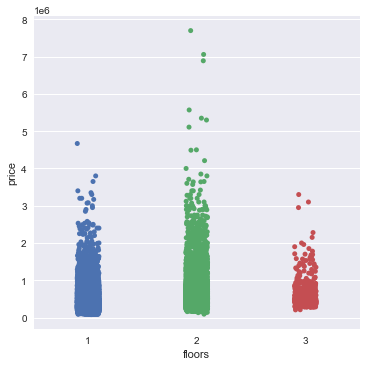

In [4745]:
sns.catplot(x="floors", y="price", data=df)

#### Waterfront

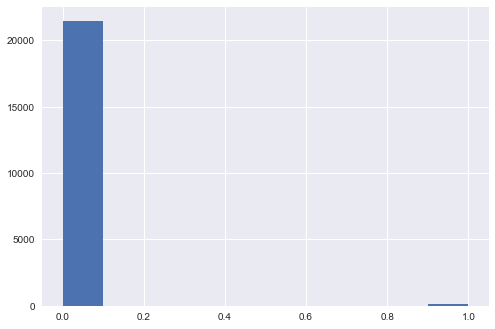

In [4746]:
histogram("waterfront")

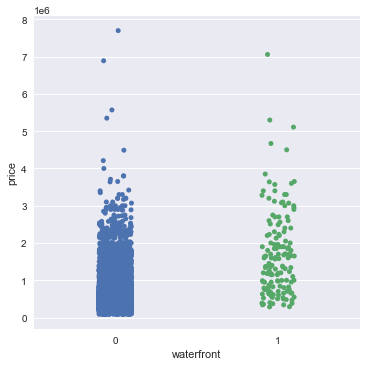

In [4747]:
sns.catplot(x="waterfront", y="price", data=df)

#### Grade

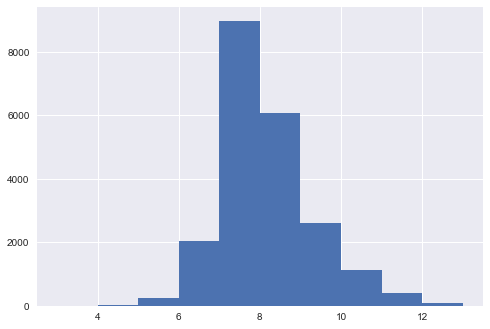

In [4748]:
histogram("grade")

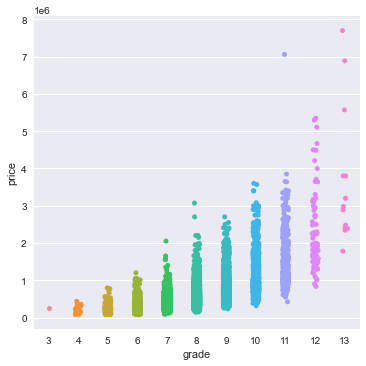

In [4749]:
sns.catplot(x="grade", y="price", data=df)

<AxesSubplot:xlabel='grade', ylabel='price'>

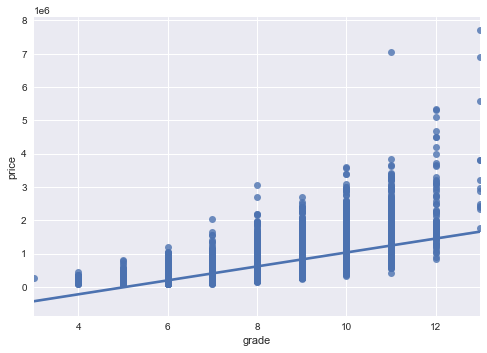

In [4750]:
reg("grade")

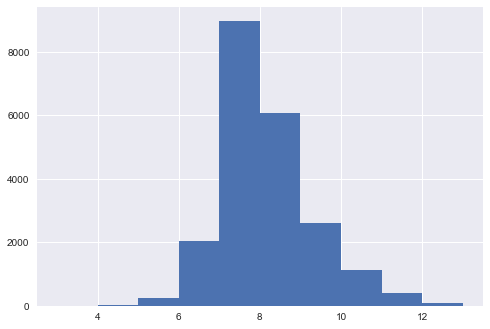

In [4751]:
histogram("grade")

#### View

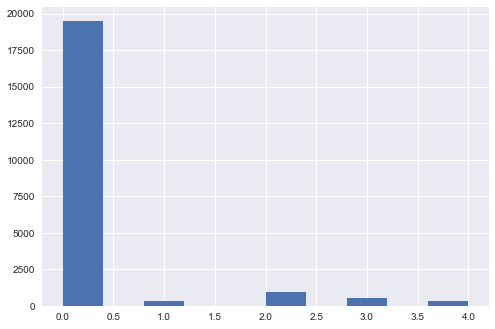

In [4752]:
histogram("view")

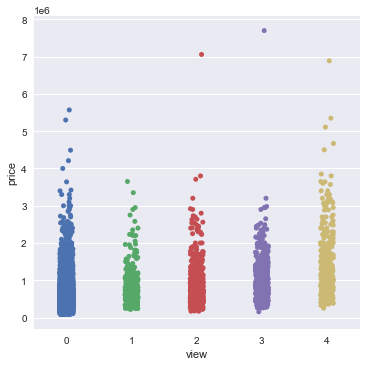

In [4753]:
sns.catplot(x="view", y="price", data=df)

<AxesSubplot:xlabel='view', ylabel='price'>

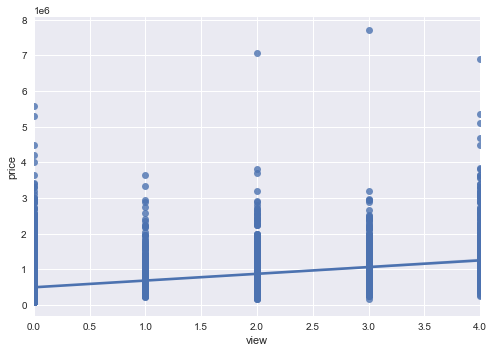

In [4754]:
reg("view")

#### SQFT above

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

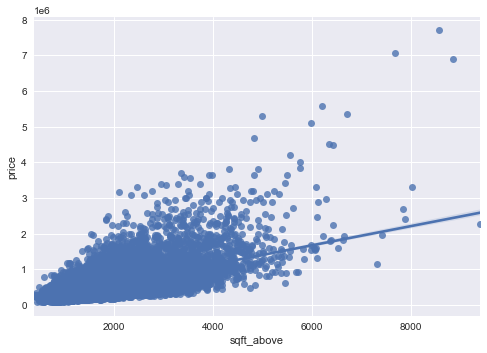

In [4755]:
reg("sqft_above")

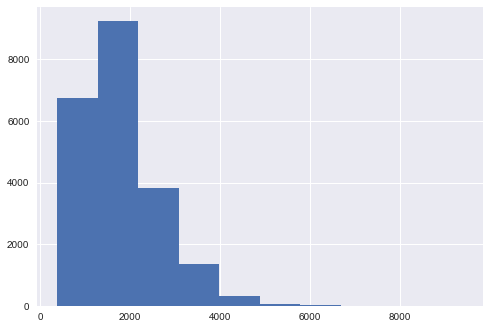

In [4756]:
histogram("sqft_above")

#### SQFT-living15

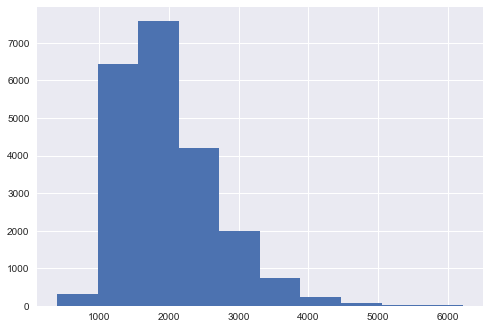

In [4757]:
histogram("sqft_living15")

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

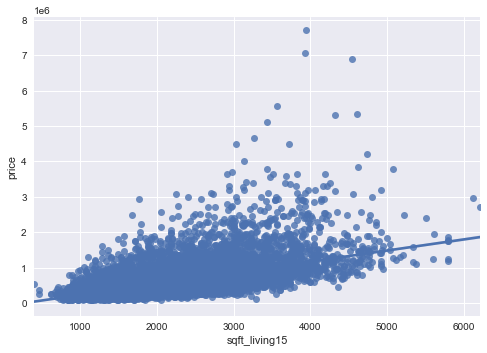

In [4758]:
reg("sqft_living15")

#### SQFT_lot15

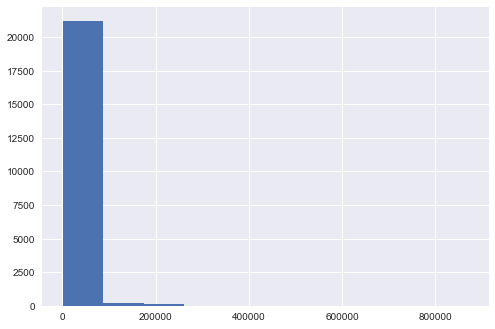

In [4759]:
histogram("sqft_lot15")

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

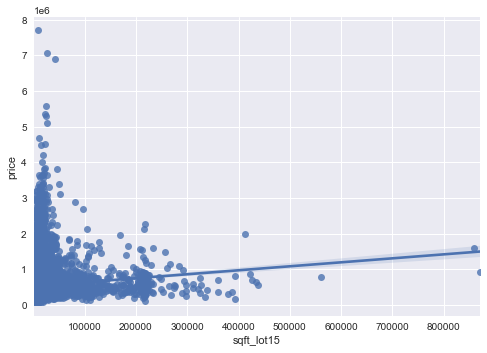

In [4760]:
reg("sqft_lot15")

#### SQFT_basement

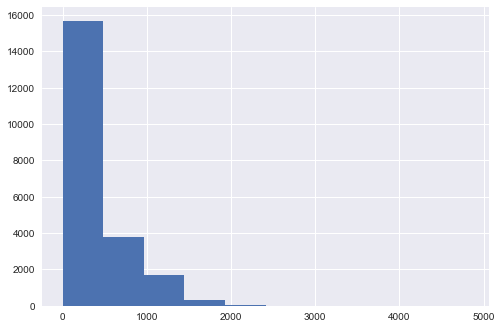

In [4761]:
histogram("sqft_basement")

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

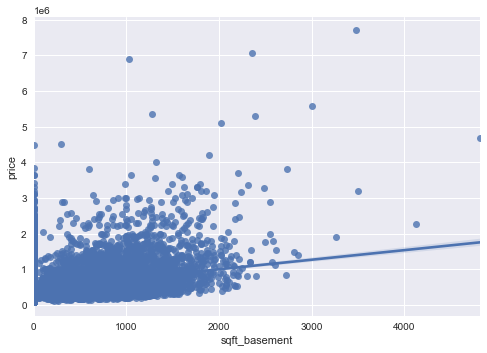

In [4762]:
reg("sqft_basement")

### Shifting dependent variable to the end

In [4763]:
def move_price_col(df):
    '''
    takes the dataframe as a parameter
    -------------------
    returns the updated dataframe with
    dependent variable in the end
    '''
    # store values of all the columns in cols
    cols = list(df.columns.values)
    
    # pop the price index from cols
    cols.pop(cols.index("price"))
    
    # add the price column to the dataframe df
    df = df[cols + ["price"]]
    return df

df = move_price_col(df)
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,large_home,how_old,renovated,has_basement,sqft_living_comparison,price
0,7129300520,10/13/2014,3,1.00,1180,5650,1,0,0,3,...,47.5112,-122.257,1340,5650,0,60,0,False,0,221900.0
1,6414100192,12/9/2014,3,2.25,2570,7242,2,0,0,3,...,47.7210,-122.319,1690,7639,0,64,1,True,1,538000.0
2,5631500400,2/25/2015,2,1.00,770,10000,1,0,0,3,...,47.7379,-122.233,2720,8062,0,82,0,False,0,180000.0
3,2487200875,12/9/2014,4,3.00,1960,5000,1,0,0,5,...,47.5208,-122.393,1360,5000,0,50,0,True,1,604000.0
4,1954400510,2/18/2015,3,2.00,1680,8080,1,0,0,3,...,47.6168,-122.045,1800,7503,0,28,0,False,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1530,1131,3,0,0,3,...,47.6993,-122.346,1530,1509,0,6,0,False,0,360000.0
21593,6600060120,2/23/2015,4,2.50,2310,5813,2,0,0,3,...,47.5107,-122.362,1830,7200,0,1,0,False,1,400000.0
21594,1523300141,6/23/2014,2,0.75,1020,1350,2,0,0,3,...,47.5944,-122.299,1020,2007,0,6,0,False,0,402101.0
21595,291310100,1/16/2015,3,2.50,1600,2388,2,0,0,3,...,47.5345,-122.069,1410,1287,0,11,0,False,1,400000.0


## Explore

In [4764]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [4765]:
df["view"].value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

In [4766]:
df["floors"].value_counts()

1    12583
2     8396
3      618
Name: floors, dtype: int64

In [4767]:
df["condition"].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [4768]:
categorical = ["zipcode"]

#### Taking care of numeric data

In [4769]:
def standardize(feature):
    '''
    takes a feature in the df as the parameter
    ------------------------------------
    returns the standardized value of the feature
    '''
    return (feature - feature.mean()) / feature.std()

In [4770]:
#df_stdized = df[numeric].apply(standardize)
#df_stdized

#### Taking care of categorical data

In [4771]:
df[categorical]

,zipcode
0,98178
1,98125
2,98028
3,98136
4,98074
...,...
21592,98103
21593,98146
21594,98144
21595,98027


In [4772]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop="first")
arr = ohe.fit_transform(df[categorical])
cat_df = pd.DataFrame(arr, columns= ohe.get_feature_names(categorical))
cat_df

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4773]:
modeling_df = pd.concat([df.drop(categorical, axis=1), cat_df], axis=1)

In [4774]:
modeling_df.to_csv("kc_cleaned.csv", index=False)

#### Initial Model before Multicollinearity check

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     203.3
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:07:33   Log-Likelihood:            -2.8911e+05
No. Observations:               21597   AIC:                         5.791e+05
Df Residuals:                   21135   BIC:                         5.828e+05
Df Model:                         461                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -28.5748     26.935     -1.061      0.289     -81.369      24.220
date[T.1/12/2015]       4.328e+04   1.61e+05      0.268      0.789   -2.73e+05     3.6e+05
date[T.1/13/2015]       4.901e+04   1.61e+05      0.304      0.761   -2.67e+05    3.65e+05
date[T.1/14/2015]       1.736e+04   1.61e+05      0.108      0.914   -2.98e+05    3.33e+05
date[T.1/15/2015]       2.969e+04   1.61e+05      0.184      0.854   -2.86e+05    3.46e+05
date[T.1/16/2015]      -7274.2922   1.61e+05     -0.045      0.964   -3.23e+05    3.08e+05
date[T.1/17/2015]       1.111e+05   2.26e+05      0.492      0.622   -3.31e+05    5.53e+05
date[T.1/19/2015]      -3.846e+04   1.69e+05     -0.227      0.820    -3.7e+05    2.93e+05
date[T.1/2/2015]        5.508e+04   1.61e+05      0.342      0.733   -2.61e+05    3.71e+05
date[T.1/20/2015]       5.603e+04   1.61e+05      0.348      0.728    -2.6e+05    3.72e+05
date[T.1/21/2015]       5.151e+04   1.61e+05      0.320      0.749   -2.64e+05    3.67e+05
date[T.1/22/2015]       3.014e+04   1.61e+05      0.187      0.852   -2.86e+05    3.46e+05
date[T.1/23/2015]       1.939e+04   1.61e+05      0.120      0.904   -2.96e+05    3.35e+05
date[T.1/24/2015]      -1.345e+05   1.78e+05     -0.754      0.451   -4.84e+05    2.15e+05
date[T.1/25/2015]       8875.6583   1.84e+05      0.048      0.962   -3.52e+05     3.7e+05
date[T.1/26/2015]      -5672.7593   1.61e+05     -0.035      0.972   -3.21e+05     3.1e+05
date[T.1/27/2015]       5.424e+04   1.61e+05      0.337      0.736   -2.61e+05     3.7e+05
date[T.1/28/2015]       2.736e+04   1.61e+05      0.170      0.865   -2.88e+05    3.43e+05
date[T.1/29/2015]       5.432e+04   1.61e+05      0.337      0.736   -2.62e+05    3.71e+05
date[T.1/30/2015]       8.517e+04   1.62e+05      0.527      0.599   -2.32e+05    4.02e+05
date[T.1/31/2015]      -8.238e+04   2.26e+05     -0.365      0.715   -5.25e+05     3.6e+05
date[T.1/5/2015]        4.633e+04   1.61e+05      0.288      0.773   -2.69e+05    3.62e+05
date[T.1/6/2015]        4.911e+04   1.61e+05      0.304      0.761   -2.67e+05    3.65e+05
date[T.1/7/2015]         5.27e+04   1.61e+05      0.327      0.743   -2.63e+05    3.68e+05
date[T.1/8/2015]        1.026e+04   1.61e+05      0.064      0.949   -3.06e+05    3.26e+05
date[T.1/9/2015]        8.939e+04   1.62e+05      0.553      0.580   -2.28e+05    4.06e+05
date[T.10/1/2014]       4.514e+04    1.6e+05      0.281      0.778   -2.69e+05     3.6e+05
date[T.10/10/2014]       2.78e+04    1.6e+05      0.173      0.862   -2.87e+05    3.42e+05
date[T.10/11/2014]      5.991e+05   1.96e+05      3.061      0.002    2.15e+05    9.83e+05
date[T.10/12/2014]      5.119e+04   1.84e+05      0.278      0.781    -3.1e+05    4.12e+05
date[T.10/13/2014]      7.781e+04   1.61e+05      0.484      0.628   -2.37e+05  

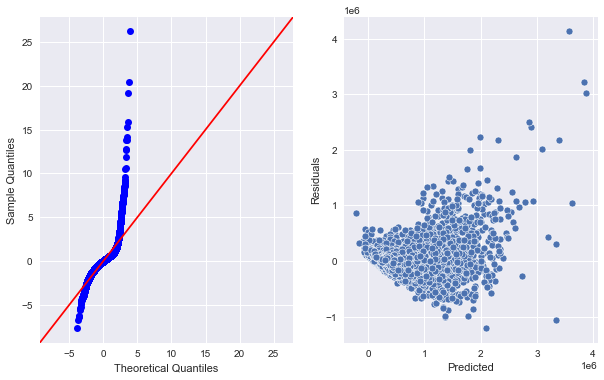

In [4775]:
def modeling(df, target="price"):
    features = " + ".join(df.drop(target, axis=1).columns)
    f = target + "~" + features
    model = smf.ols(formula = f, data=df).fit()
    display(model.summary())
    
    fig, ax = plt.subplots(ncols=2, figsize=(10, 6))
    sm.graphics.qqplot(model.resid, line="45", fit=True, ax=ax[0])
    sns.scatterplot(x=model.predict(df, transform=True), y=model.resid, ax=ax[1])
    ax[1].set_ylabel('Residuals')
    ax[1].set_xlabel('Predicted')
    return model

initial_model = modeling(modeling_df)
    

#### Multicollinearity check

In [4776]:
df.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,large_home,how_old,renovated,has_basement,sqft_living_comparison,price
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.019229,-0.003599,0.011772,-0.023803,0.008188,...,-0.001798,0.020672,-0.002701,-0.138557,-0.009057,-0.021617,-0.010621,0.003495,-0.004408,-0.016772
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.158065,-0.002127,0.078354,0.026496,0.356563,...,-0.009951,0.132054,0.393406,0.030690,0.406468,-0.155670,0.017635,0.158412,0.365105,0.308787
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.520922,0.063629,0.186016,-0.126479,0.665838,...,0.024280,0.224903,0.569884,0.088303,0.172900,-0.507173,0.046742,0.159863,0.342441,0.525906
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353372,0.104637,0.281715,-0.059445,0.762779,...,0.052155,0.241214,0.756402,0.184342,0.178745,-0.318152,0.050829,0.201198,0.470834,0.701917
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.008603,0.021459,0.075054,-0.008830,0.114731,...,-0.085514,0.230227,0.144763,0.718204,0.008984,-0.052946,0.005091,-0.034889,0.047754,0.089876
floors,0.019229,0.158065,0.520922,0.353372,-0.008603,1.000000,0.018321,0.023711,-0.293463,0.473273,...,0.029218,0.159481,0.296797,-0.012766,0.023155,-0.578549,-0.009580,-0.246878,0.109445,0.237264
waterfront,-0.003599,-0.002127,0.063629,0.104637,0.021459,0.018321,1.000000,0.380543,0.016648,0.082818,...,-0.012157,-0.037628,0.083823,0.030658,0.007978,0.024487,0.074267,0.039220,0.022118,0.264306
view,0.011772,0.078354,0.186016,0.281715,0.075054,0.023711,0.380543,1.000000,0.045622,0.249082,...,0.006321,-0.077702,0.278928,0.073083,0.044224,0.054452,0.090480,0.176905,0.062615,0.393497
condition,-0.023803,0.026496,-0.126479,-0.059445,-0.008830,-0.293463,0.016648,0.045622,1.000000,-0.146896,...,-0.015102,-0.105877,-0.093072,-0.003126,0.011028,0.361592,-0.055383,0.130542,0.056044,0.036056
grade,0.008188,0.356563,0.665838,0.762779,0.114731,0.473273,0.082818,0.249082,-0.146896,1.000000,...,0.113575,0.200341,0.713867,0.120981,0.048060,-0.447865,0.015259,0.050701,0.213058,0.667951


In [4777]:
abs(df.corr()) > 0.75

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,large_home,how_old,renovated,has_basement,sqft_living_comparison,price
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


(<Figure size 1080x720 with 2 Axes>, <AxesSubplot:>)

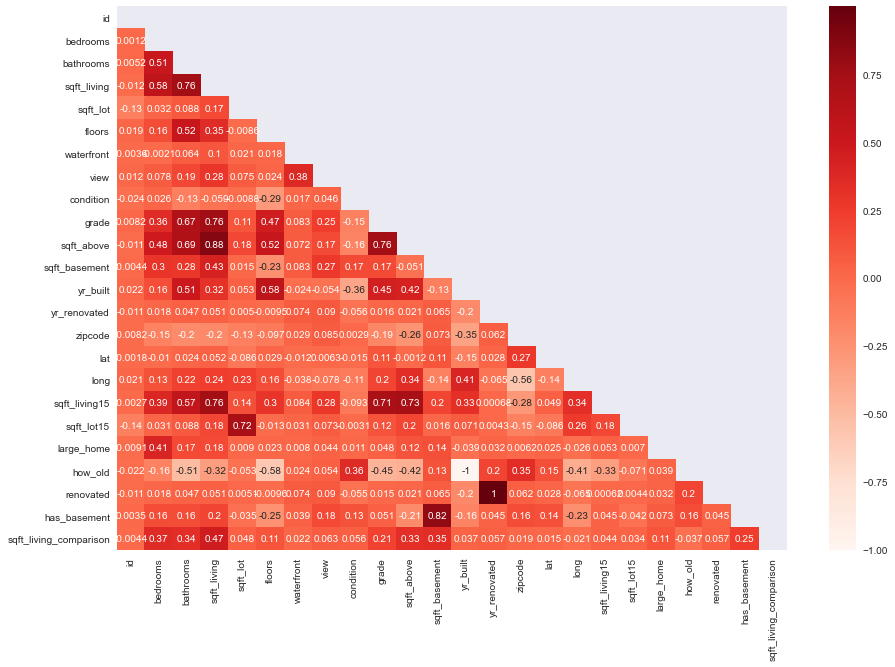

In [4778]:
def heatmap(df, figsize=(15, 10), cmap="Reds"):
    corr = df.drop("price", axis=1).corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr, annot=True,cmap=cmap, mask=mask)
    return fig, ax

heatmap(df)

In [4779]:
## Making a dataframe with all the non-duplicate correlation coefficient
df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr["pairs"] = list(zip(df_corr["level_0"], df_corr["level_1"]))

## Setting index to the new column "pairs" created
df_corr.set_index(["pairs"], inplace=True)

## Dropping the columns "level_1" and "level_0"
df_corr.drop(columns=["level_1", "level_0"], inplace=True)

df_corr.columns = ["cc"]

df_corr[(df_corr["cc"] > 0.75) & (df_corr["cc"] < 1)]


,cc
pairs,
"(renovated, yr_renovated)",0.999968
"(yr_renovated, renovated)",0.999968
"(sqft_living, sqft_above)",0.876448
"(sqft_above, sqft_living)",0.876448
"(has_basement, sqft_basement)",0.820893
"(sqft_basement, has_basement)",0.820893
"(sqft_living, grade)",0.762779
"(grade, sqft_living)",0.762779
"(sqft_living15, sqft_living)",0.756402


As we can see yr_renovated and sqft_living are highly correlated variables, we shall drop these columns from our main dataframe to avoid modeling issues

In [4780]:
modeling_df.drop(["yr_renovated", "sqft_living"], axis=1, inplace=True)

In [4781]:
modeling_df

,id,date,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,10/13/2014,3,1.00,5650,1,0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6414100192,12/9/2014,3,2.25,7242,2,0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,2,1.00,10000,1,0,0,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,4,3.00,5000,1,0,0,5,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2/18/2015,3,2.00,8080,1,0,0,3,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1131,3,0,0,3,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,6600060120,2/23/2015,4,2.50,5813,2,0,0,3,8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,1523300141,6/23/2014,2,0.75,1350,2,0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,291310100,1/16/2015,3,2.50,2388,2,0,0,3,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

### Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [4782]:
modeling_df.drop(["id", "date"], axis=1, inplace=True)
modeling_df

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,5650,1,0,0,3,7,1180,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,7242,2,0,0,3,7,2170,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,10000,1,0,0,3,6,770,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,5000,1,0,0,5,7,1050,910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,8080,1,0,0,3,8,1680,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,3,0,0,3,8,1530,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,4,2.50,5813,2,0,0,3,8,2310,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,2,0.75,1350,2,0,0,3,7,1020,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,3,2.50,2388,2,0,0,3,8,1600,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1042.
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:07:40   Log-Likelihood:            -2.8946e+05
No. Observations:               21597   AIC:                         5.791e+05
Df Residuals:                   21508   BIC:                         5.798e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -13.4118      3.021     -4.439      0.000     -19.333      -7.490
has_basement[T.True]   -2.522e+04   4288.918     -5.880      0.000   -3.36e+04   -1.68e+04
bedrooms               -2.532e+04   1651.655    -15.328      0.000   -2.86e+04   -2.21e+04
bathrooms               2.737e+04   2630.551     10.403      0.000    2.22e+04    3.25e+04
sqft_lot                   0.2341      0.038      6.101      0.000       0.159       0.309
floors                 -4.653e+04   3175.675    -14.652      0.000   -5.28e+04   -4.03e+04
waterfront              6.795e+05   1.47e+04     46.266      0.000    6.51e+05    7.08e+05
view                    5.542e+04   1739.250     31.863      0.000     5.2e+04    5.88e+04
condition                2.66e+04   1922.195     13.841      0.000    2.28e+04    3.04e+04
grade                   5.776e+04   1826.135     31.629      0.000    5.42e+04    6.13e+04
sqft_above               227.1644      3.462     65.622      0.000     220.379     233.950
sqft_basement            177.1854      5.214     33.983      0.000     166.966     187.405
yr_built               -1.384e+04   3042.573     -4.550      0.000   -1.98e+04   -7881.185
lat                     1.925e+05   6.33e+04      3.040      0.002    6.84e+04    3.17e+05
long                   -1.493e+05   4.55e+04     -3.280      0.001   -2.38e+05   -6.01e+04
sqft_living15            -10.8531      3.223     -3.367      0.001     -17.171      -4.535
sqft_lot15                -0.1407      0.060     -2.328      0.020      -0.259      -0.022
large_home              4691.6795   9929.365      0.473      0.637   -1.48e+04    2.42e+04
how_old                -1.318e+04   3045.150     -4.328      0.000   -1.91e+04   -7211.178
renovated               3.948e+04   6385.540      6.183      0.000     2.7e+04     5.2e+04
sqft_living_comparison -4.896e+04   3004.429    -16.295      0.000   -5.48e+04   -4.31e+04
zipcode_98002           3.409e+04   1.45e+04      2.359      0.018    5761.789    6.24e+04
zipcode_98003          -2.491e+04   1.29e+04     -1.928      0.054   -5.02e+04     415.187
zipcode_98004           7.182e+05   2.35e+04     30.592      0.000    6.72e+05    7.64e+05
zipcode_98005           2.541e+05   2.51e+04     10.125      0.000    2.05e+05    3.03e+05
zipcode_98006            2.33e+05   2.05e+04     11.354      0.000    1.93e+05    2.73e+05
zipcode_98007           2.046e+05   2.59e+04      7.898      0.000    1.54e+05    2.55e+05
zipcode_98008           2.107e+05   2.46e+04      8.564      0.000    1.62e+05    2.59e+05
zipcode_98010           1.036e+05    2.2e+04      4.701      0.000    6.04e+04    1.47e+05
zipcode_98011           4.462e+04    3.2e+04      1.395      0.163   -1.81e+04    1.07e+05
zipcode_98014           9.528e+04   3.52e+04      2.710      0.007    2.64e+04  

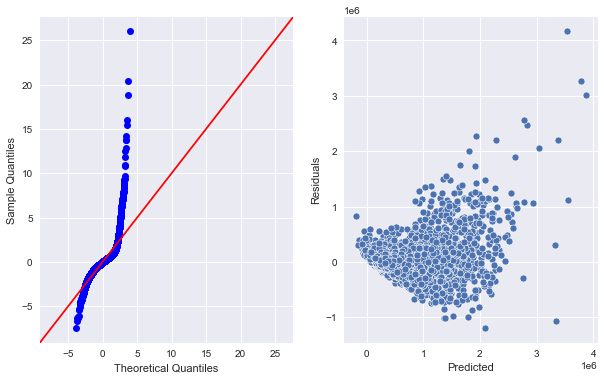

In [4783]:
modeling(modeling_df)

The p-value of long, sqft_lot and how_old is greater than our 0.05 alpha level. So we shall drop these columns as they are statistically insignificant.

In [4784]:
drop_cols = ["long", "sqft_lot15", "how_old"]
modeling_df.drop(drop_cols, axis=1, inplace=True)
modeling_df

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,5650,1,0,0,3,7,1180,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,7242,2,0,0,3,7,2170,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,10000,1,0,0,3,6,770,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,5000,1,0,0,5,7,1050,910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,8080,1,0,0,3,8,1680,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,3,0,0,3,8,1530,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,4,2.50,5813,2,0,0,3,8,2310,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,2,0.75,1350,2,0,0,3,7,1020,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,3,2.50,2388,2,0,0,3,8,1600,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1065.
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:07:42   Log-Likelihood:            -2.8946e+05
No. Observations:               21597   AIC:                         5.791e+05
Df Residuals:                   21510   BIC:                         5.798e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -9.001e+06   2.99e+06     -3.008      0.003   -1.49e+07   -3.14e+06
has_basement[T.True]   -2.505e+04   4290.210     -5.840      0.000   -3.35e+04   -1.66e+04
bedrooms               -2.511e+04   1651.082    -15.210      0.000   -2.83e+04   -2.19e+04
bathrooms               2.752e+04   2631.002     10.459      0.000    2.24e+04    3.27e+04
sqft_lot                   0.1691      0.029      5.807      0.000       0.112       0.226
floors                 -4.586e+04   3172.646    -14.456      0.000   -5.21e+04   -3.96e+04
waterfront              6.808e+05   1.47e+04     46.353      0.000    6.52e+05     7.1e+05
view                     5.55e+04   1739.737     31.899      0.000    5.21e+04    5.89e+04
condition               2.654e+04   1922.677     13.803      0.000    2.28e+04    3.03e+04
grade                   5.793e+04   1826.268     31.720      0.000    5.44e+04    6.15e+04
sqft_above               226.4946      3.459     65.482      0.000     219.715     233.274
sqft_basement            176.8344      5.214     33.912      0.000     166.614     187.055
yr_built                -673.4043     66.785    -10.083      0.000    -804.308    -542.501
lat                     2.075e+05   6.32e+04      3.284      0.001    8.37e+04    3.31e+05
sqft_living15            -11.2082      3.220     -3.481      0.001     -17.519      -4.897
large_home              4152.7589   9931.460      0.418      0.676   -1.53e+04    2.36e+04
renovated               3.908e+04   6387.003      6.119      0.000    2.66e+04    5.16e+04
sqft_living_comparison -4.889e+04   3005.370    -16.269      0.000   -5.48e+04    -4.3e+04
zipcode_98002           2.546e+04   1.42e+04      1.791      0.073   -2410.612    5.33e+04
zipcode_98003          -1.922e+04   1.28e+04     -1.501      0.133   -4.43e+04    5878.255
zipcode_98004           7.039e+05   2.31e+04     30.506      0.000    6.59e+05    7.49e+05
zipcode_98005           2.337e+05   2.44e+04      9.595      0.000    1.86e+05    2.81e+05
zipcode_98006           2.109e+05   1.94e+04     10.887      0.000    1.73e+05    2.49e+05
zipcode_98007           1.808e+05   2.49e+04      7.268      0.000    1.32e+05     2.3e+05
zipcode_98008           1.829e+05   2.31e+04      7.914      0.000    1.38e+05    2.28e+05
zipcode_98010           6.047e+04   1.83e+04      3.310      0.001    2.47e+04    9.63e+04
zipcode_98011           2.766e+04   3.16e+04      0.876      0.381   -3.42e+04    8.96e+04
zipcode_98014           2.296e+04   2.85e+04      0.806      0.420   -3.29e+04    7.88e+04
zipcode_98019           -825.6275   3.07e+04     -0.027      0.979   -6.09e+04    5.93e+04
zipcode_98022           1345.6465    1.5e+04      0.090      0.928    -2.8e+04    3.07e+04
zipcode_98023          -3.337e+04   1.11e+04     -3.003      0.003   -5.51e+04  

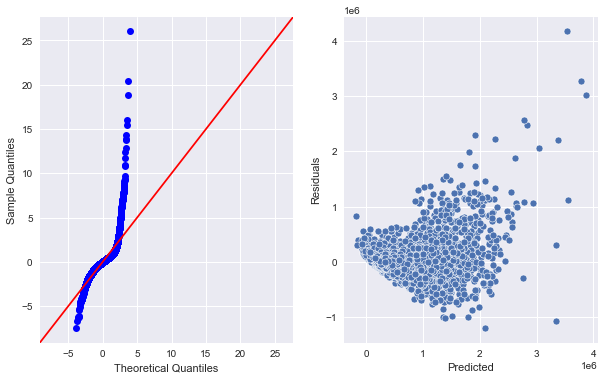

In [4785]:
modeling(modeling_df)

### Removing outliers from the Dataset to complete homoscedasticity assumptions

In [4786]:
numeric_cols = ['bedrooms','bathrooms','sqft_lot','view','condition','grade',"sqft_basement", "price"]

In [4787]:
for col in numeric_cols:
    modeling_df = modeling_df[find_outliers(modeling_df[col]) == False]

modeling_df

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,5650,1,0,0,3,7,1180,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,7242,2,0,0,3,7,2170,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,10000,1,0,0,3,6,770,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,5000,1,0,0,5,7,1050,910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,8080,1,0,0,3,8,1680,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,3,0,0,3,8,1530,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,4,2.50,5813,2,0,0,3,8,2310,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,2,0.75,1350,2,0,0,3,7,1020,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,3,2.50,2388,2,0,0,3,8,1600,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


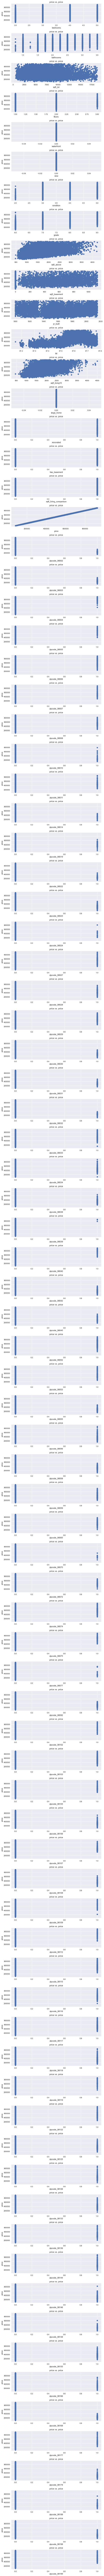

In [4788]:
def plot(df, target="price"):
    fig, ax = plt.subplots(nrows=len(df.columns), figsize=(8, 196))
    for i, cols in enumerate(df.columns):
        ax[i].scatter(df[cols], df[target])
        ax[i].set_xlabel(cols)
        ax[i].set_ylabel(target)
        ax[i].set_title(f"{col} vs. {target}")
    plt.tight_layout()
    return plt.show()

plot(modeling_df, target="price")
        

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     869.3
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:07:58   Log-Likelihood:            -1.9116e+05
No. Observations:               15188   AIC:                         3.825e+05
Df Residuals:                   15104   BIC:                         3.831e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                1.57e+05   1.76e+06      0.089      0.929   -3.28e+06     3.6e+06
has_basement[T.True]    5316.3825   2670.357      1.991      0.047      82.160    1.06e+04
bedrooms                -355.9379   1002.750     -0.355      0.723   -2321.449    1609.573
bathrooms               1.292e+04   1544.545      8.367      0.000    9895.406     1.6e+04
sqft_lot                   1.1607      0.242      4.805      0.000       0.687       1.634
floors                 -1.771e+04   1834.101     -9.658      0.000   -2.13e+04   -1.41e+04
waterfront              3.819e-06   2.23e-07     17.119      0.000    3.38e-06    4.26e-06
view                     5.36e-06   3.13e-07     17.144      0.000    4.75e-06    5.97e-06
condition                2.12e+04   1049.047     20.210      0.000    1.91e+04    2.33e+04
grade                   3.847e+04   1169.573     32.896      0.000    3.62e+04    4.08e+04
sqft_above               111.6518      2.471     45.177      0.000     106.807     116.496
sqft_basement             65.0496      4.358     14.926      0.000      56.507      73.592
yr_built                -398.4092     37.776    -10.546      0.000    -472.456    -324.363
lat                     6004.5802   3.71e+04      0.162      0.871   -6.66e+04    7.87e+04
sqft_living15             31.1552      2.228     13.986      0.000      26.789      35.521
large_home             -1.538e-09   8.81e-11    -17.448      0.000   -1.71e-09   -1.37e-09
renovated               2.794e+04   3879.412      7.202      0.000    2.03e+04    3.55e+04
sqft_living_comparison -1182.7929   1676.179     -0.706      0.480   -4468.306    2102.721
zipcode_98002           7812.0293   6873.015      1.137      0.256   -5659.912    2.13e+04
zipcode_98003           3851.5531   6309.896      0.610      0.542   -8516.606    1.62e+04
zipcode_98004           4.829e+05   1.42e+04     34.095      0.000    4.55e+05    5.11e+05
zipcode_98005           3.145e+05   1.38e+04     22.822      0.000    2.88e+05    3.42e+05
zipcode_98006           2.544e+05   1.11e+04     22.831      0.000    2.33e+05    2.76e+05
zipcode_98007           2.453e+05   1.37e+04     17.853      0.000    2.18e+05    2.72e+05
zipcode_98008           2.325e+05   1.31e+04     17.752      0.000    2.07e+05    2.58e+05
zipcode_98010            7.31e+04   1.21e+04      6.019      0.000    4.93e+04    9.69e+04
zipcode_98011           1.504e+05   1.79e+04      8.418      0.000    1.15e+05    1.85e+05
zipcode_98014            9.87e+04   1.82e+04      5.433      0.000    6.31e+04    1.34e+05
zipcode_98019           9.518e+04   1.74e+04      5.457      0.000     6.1e+04    1.29e+05
zipcode_98022           1.093e+04   8645.682      1.264      0.206   -6014.963    2.79e+04
zipcode_98023          -1.354e+04   5449.133     -2.485      0.013   -2.42e+04  

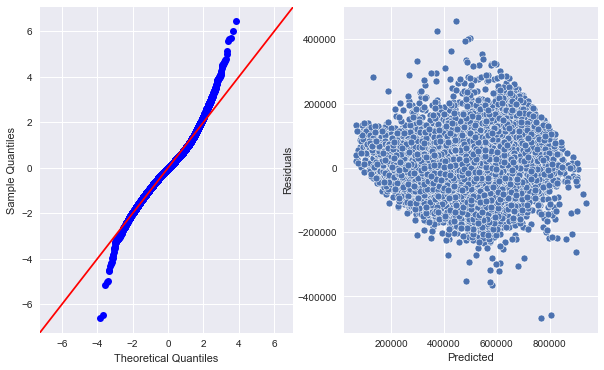

In [4789]:
model = modeling(modeling_df)

In [4790]:
model.pvalues[model.pvalues > 0.05]

Intercept                 0.928721
bedrooms                  0.722623
lat                       0.871310
sqft_living_comparison    0.480418
zipcode_98002             0.255714
zipcode_98003             0.541607
zipcode_98022             0.206105
zipcode_98030             0.253698
zipcode_98031             0.063985
zipcode_98032             0.945337
zipcode_98042             0.072514
dtype: float64

from p values, we can see floors and lat are insignificant, hence we can get rid of them.

In [4791]:
modeling_df.drop(["floors", "lat"], axis=1, inplace=True)

In [4792]:
modeling_df

,bedrooms,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,5650,0,0,3,7,1180,0.0,1955,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,7242,0,0,3,7,2170,400.0,1951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,10000,0,0,3,6,770,0.0,1933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,5000,0,0,5,7,1050,910.0,1965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,8080,0,0,3,8,1680,0.0,1987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,0,0,3,8,1530,0.0,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,4,2.50,5813,0,0,3,8,2310,0.0,2014,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,2,0.75,1350,0,0,3,7,1020,0.0,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,3,2.50,2388,0,0,3,8,1600,0.0,2004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     884.3
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:08:01   Log-Likelihood:            -1.9120e+05
No. Observations:               15188   AIC:                         3.826e+05
Df Residuals:                   15106   BIC:                         3.832e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               7.126e+05    6.8e+04     10.475      0.000    5.79e+05    8.46e+05
has_basement[T.True]    7176.8072   2671.126      2.687      0.007    1941.077    1.24e+04
bedrooms                 296.3348   1003.490      0.295      0.768   -1670.627    2263.297
bathrooms               9443.2711   1506.503      6.268      0.000    6490.344    1.24e+04
sqft_lot                   1.6912      0.236      7.167      0.000       1.229       2.154
waterfront              2.486e-06   2.51e-07      9.910      0.000    1.99e-06    2.98e-06
view                    2.769e-06   3.11e-07      8.908      0.000    2.16e-06    3.38e-06
condition               2.162e+04   1051.141     20.569      0.000    1.96e+04    2.37e+04
grade                   3.806e+04   1171.992     32.475      0.000    3.58e+04    4.04e+04
sqft_above               107.1077      2.434     44.012      0.000     102.338     111.878
sqft_basement             68.5225      4.356     15.732      0.000      59.985      77.060
yr_built                -545.2389     34.689    -15.718      0.000    -613.233    -477.245
sqft_living15             32.6915      2.229     14.669      0.000      28.323      37.060
large_home             -2.036e-09   3.67e-10     -5.553      0.000   -2.76e-09   -1.32e-09
renovated               2.552e+04   3882.833      6.573      0.000    1.79e+04    3.31e+04
sqft_living_comparison -1108.4827   1681.053     -0.659      0.510   -4403.551    2186.585
zipcode_98002           8143.1916   6893.663      1.181      0.238   -5369.222    2.17e+04
zipcode_98003           4543.0262   6328.025      0.718      0.473   -7860.669    1.69e+04
zipcode_98004           4.824e+05   8674.924     55.608      0.000    4.65e+05    4.99e+05
zipcode_98005           3.174e+05   8645.138     36.713      0.000       3e+05    3.34e+05
zipcode_98006           2.547e+05   6321.098     40.298      0.000    2.42e+05    2.67e+05
zipcode_98007           2.462e+05   8168.924     30.138      0.000     2.3e+05    2.62e+05
zipcode_98008           2.358e+05   6567.469     35.908      0.000    2.23e+05    2.49e+05
zipcode_98010           7.198e+04   1.22e+04      5.914      0.000    4.81e+04    9.58e+04
zipcode_98011            1.53e+05   7029.777     21.772      0.000    1.39e+05    1.67e+05
zipcode_98014           1.003e+05   1.21e+04      8.321      0.000    7.67e+04    1.24e+05
zipcode_98019           9.618e+04   7479.371     12.859      0.000    8.15e+04    1.11e+05
zipcode_98022           1.152e+04   7686.201      1.499      0.134   -3547.694    2.66e+04
zipcode_98023          -1.258e+04   5462.779     -2.302      0.021   -2.33e+04   -1867.512
zipcode_98024            1.27e+05   1.52e+04      8.378      0.000    9.73e+04    1.57e+05
zipcode_98027           2.321e+05   6625.332     35.027      0.000    2.19e+05  

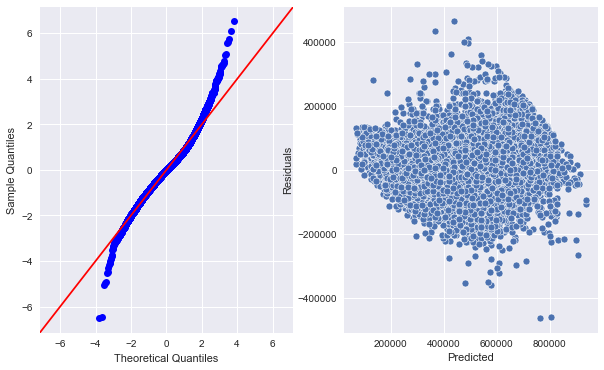

In [4793]:
model = modeling(modeling_df)

In [4794]:
modeling_df.drop(["large_home","renovated", "bedrooms"], axis=1, inplace=True)

dropping large_home and renovated from the dataset since they are insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     903.7
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:08:03   Log-Likelihood:            -1.9123e+05
No. Observations:               15188   AIC:                         3.826e+05
Df Residuals:                   15108   BIC:                         3.832e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               8.253e+05   6.56e+04     12.586      0.000    6.97e+05    9.54e+05
has_basement[T.True]    6699.2986   2670.629      2.509      0.012    1464.542    1.19e+04
bathrooms                1.07e+04   1478.575      7.234      0.000    7797.378    1.36e+04
sqft_lot                   1.6669      0.236      7.061      0.000       1.204       2.130
waterfront             -1.996e-06   2.18e-07     -9.140      0.000   -2.42e-06   -1.57e-06
view                   -2.021e-06   1.95e-07    -10.347      0.000    -2.4e-06   -1.64e-06
condition               2.058e+04   1040.280     19.782      0.000    1.85e+04    2.26e+04
grade                   3.843e+04   1167.975     32.907      0.000    3.61e+04    4.07e+04
sqft_above               107.4582      2.338     45.960      0.000     102.875     112.041
sqft_basement             69.1251      4.279     16.156      0.000      60.739      77.512
yr_built                -601.6952     33.580    -17.918      0.000    -667.517    -535.874
sqft_living15             31.8386      2.228     14.292      0.000      27.472      36.205
sqft_living_comparison -1120.1740   1682.087     -0.666      0.505   -4417.268    2176.921
zipcode_98002           8227.6744   6903.043      1.192      0.233   -5303.125    2.18e+04
zipcode_98003           4055.0454   6335.571      0.640      0.522   -8363.440    1.65e+04
zipcode_98004           4.828e+05   8686.205     55.577      0.000    4.66e+05       5e+05
zipcode_98005           3.171e+05   8656.432     36.635      0.000       3e+05    3.34e+05
zipcode_98006           2.548e+05   6329.656     40.261      0.000    2.42e+05    2.67e+05
zipcode_98007            2.46e+05   8178.773     30.073      0.000     2.3e+05    2.62e+05
zipcode_98008           2.355e+05   6574.112     35.817      0.000    2.23e+05    2.48e+05
zipcode_98010           7.387e+04   1.22e+04      6.063      0.000       5e+04    9.78e+04
zipcode_98011           1.531e+05   7037.801     21.748      0.000    1.39e+05    1.67e+05
zipcode_98014           1.006e+05   1.21e+04      8.337      0.000    7.69e+04    1.24e+05
zipcode_98019           9.643e+04   7487.682     12.878      0.000    8.17e+04    1.11e+05
zipcode_98022           1.327e+04   7690.391      1.726      0.084   -1801.247    2.83e+04
zipcode_98023          -1.286e+04   5469.894     -2.352      0.019   -2.36e+04   -2143.152
zipcode_98024           1.276e+05   1.52e+04      8.406      0.000    9.78e+04    1.57e+05
zipcode_98027           2.316e+05   6632.333     34.926      0.000    2.19e+05    2.45e+05
zipcode_98028           1.342e+05   6413.564     20.923      0.000    1.22e+05    1.47e+05
zipcode_98029           2.351e+05   6165.035     38.126      0.000    2.23e+05    2.47e+05
zipcode_98030           8358.2281   6338.697      1.319      0.187   -4066.386  

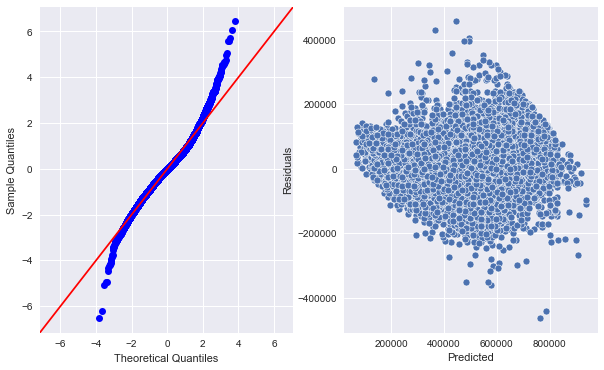

In [4795]:
model = modeling(modeling_df)

In [4796]:
modeling_df

,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1.00,5650,0,0,3,7,1180,0.0,1955,1340,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.25,7242,0,0,3,7,2170,400.0,1951,1690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.00,10000,0,0,3,6,770,0.0,1933,2720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.00,5000,0,0,5,7,1050,910.0,1965,1360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.00,8080,0,0,3,8,1680,0.0,1987,1800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2.50,1131,0,0,3,8,1530,0.0,2009,1530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,2.50,5813,0,0,3,8,2310,0.0,2014,1830,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.75,1350,0,0,3,7,1020,0.0,2009,1020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,2.50,2388,0,0,3,8,1600,0.0,2004,1410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Outliers based on price

In [4797]:
outliers_price = modeling_df[find_outliers(modeling_df["price"]) == False]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     894.0
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:08:05   Log-Likelihood:            -1.9018e+05
No. Observations:               15121   AIC:                         3.805e+05
Df Residuals:                   15041   BIC:                         3.811e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               8.029e+05    6.5e+04     12.359      0.000    6.76e+05     9.3e+05
has_basement[T.True]    6851.0621   2640.788      2.594      0.009    1674.797     1.2e+04
bathrooms               1.046e+04   1464.469      7.144      0.000    7591.585    1.33e+04
sqft_lot                   1.6678      0.233      7.146      0.000       1.210       2.125
waterfront              4.394e-06    3.8e-07     11.559      0.000    3.65e-06    5.14e-06
view                   -8.833e-06   8.65e-07    -10.207      0.000   -1.05e-05   -7.14e-06
condition               2.068e+04   1028.773     20.106      0.000    1.87e+04    2.27e+04
grade                   3.809e+04   1155.648     32.963      0.000    3.58e+04    4.04e+04
sqft_above               105.0044      2.324     45.191      0.000     100.450     109.559
sqft_basement             66.7409      4.244     15.725      0.000      58.422      75.060
yr_built                -587.7742     33.269    -17.667      0.000    -652.985    -522.563
sqft_living15             32.7321      2.216     14.769      0.000      28.388      37.076
sqft_living_comparison  -542.9061   1665.916     -0.326      0.745   -3808.304    2722.492
zipcode_98002           7871.3396   6810.595      1.156      0.248   -5478.255    2.12e+04
zipcode_98003           3956.9433   6250.520      0.633      0.527   -8294.836    1.62e+04
zipcode_98004            4.68e+05   8879.892     52.707      0.000    4.51e+05    4.85e+05
zipcode_98005           3.164e+05   8574.972     36.893      0.000       3e+05    3.33e+05
zipcode_98006           2.525e+05   6271.234     40.267      0.000     2.4e+05    2.65e+05
zipcode_98007           2.445e+05   8096.641     30.194      0.000    2.29e+05     2.6e+05
zipcode_98008           2.356e+05   6486.094     36.328      0.000    2.23e+05    2.48e+05
zipcode_98010           7.343e+04    1.2e+04      6.109      0.000    4.99e+04     9.7e+04
zipcode_98011           1.537e+05   6943.466     22.130      0.000     1.4e+05    1.67e+05
zipcode_98014           9.997e+04   1.19e+04      8.398      0.000    7.66e+04    1.23e+05
zipcode_98019           9.688e+04   7387.281     13.114      0.000    8.24e+04    1.11e+05
zipcode_98022           1.294e+04   7587.222      1.706      0.088   -1930.585    2.78e+04
zipcode_98023           -1.28e+04   5396.485     -2.372      0.018   -2.34e+04   -2221.661
zipcode_98024           1.276e+05    1.5e+04      8.521      0.000    9.82e+04    1.57e+05
zipcode_98027           2.304e+05   6562.689     35.111      0.000    2.18e+05    2.43e+05
zipcode_98028           1.345e+05   6327.540     21.258      0.000    1.22e+05    1.47e+05
zipcode_98029           2.357e+05   6082.735     38.750      0.000    2.24e+05    2.48e+05
zipcode_98030           8492.4845   6253.571      1.358      0.174   -3765.275  

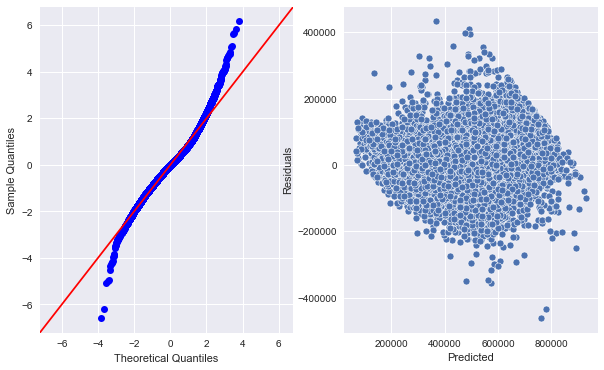

In [4798]:
modeling(outliers_price)

In [4799]:
outliers_price.drop(["sqft_living_comparison"], axis=1, inplace=True)

C:\Users\Vinayak Modgil\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [4800]:
outliers_price["has_basement"].value_counts()

False    9996
True     5125
Name: has_basement, dtype: int64

### Scaling

In [4801]:
cols_numeric = [col for col in outliers_price.columns if (col.startswith('zipcode')==False) & (col.startswith('has')==False) & (col!='price')]
cols_numeric

['bathrooms',
 'sqft_lot',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'sqft_living15']

In [4802]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = outliers_price.copy()
df_scaled[cols_numeric] = scaler.fit_transform(df_scaled[cols_numeric])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     905.5
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:08:08   Log-Likelihood:            -1.9018e+05
No. Observations:               15121   AIC:                         3.805e+05
Df Residuals:                   15042   BIC:                         3.811e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.647e+05   4296.437     61.616      0.000    2.56e+05    2.73e+05
has_basement[T.True]  6867.2777   2640.240      2.601      0.009    1692.085     1.2e+04
bathrooms             6750.9965    945.369      7.141      0.000    4897.957    8604.036
sqft_lot              5678.8127    794.942      7.144      0.000    4120.630    7236.995
waterfront            3.434e-09   1.13e-10     30.507      0.000    3.21e-09    3.65e-09
view                 -2.247e-09   6.64e-11    -33.825      0.000   -2.38e-09   -2.12e-09
condition             1.317e+04    655.111     20.105      0.000    1.19e+04    1.45e+04
grade                 3.042e+04    920.297     33.053      0.000    2.86e+04    3.22e+04
sqft_above            6.366e+04   1129.156     56.380      0.000    6.14e+04    6.59e+04
sqft_basement         2.113e+04   1256.362     16.819      0.000    1.87e+04    2.36e+04
yr_built             -1.736e+04    982.720    -17.670      0.000   -1.93e+04   -1.54e+04
sqft_living15          1.69e+04    962.574     17.558      0.000     1.5e+04    1.88e+04
zipcode_98002         7892.3171   6810.088      1.159      0.247   -5456.285    2.12e+04
zipcode_98003         3972.8266   6250.144      0.636      0.525   -8278.217    1.62e+04
zipcode_98004          4.68e+05   8879.565     52.707      0.000    4.51e+05    4.85e+05
zipcode_98005         3.164e+05   8573.807     36.902      0.000       3e+05    3.33e+05
zipcode_98006         2.526e+05   6270.156     40.279      0.000     2.4e+05    2.65e+05
zipcode_98007         2.445e+05   8096.347     30.194      0.000    2.29e+05     2.6e+05
zipcode_98008         2.357e+05   6485.329     36.336      0.000    2.23e+05    2.48e+05
zipcode_98010         7.344e+04    1.2e+04      6.110      0.000    4.99e+04     9.7e+04
zipcode_98011         1.537e+05   6942.305     22.139      0.000     1.4e+05    1.67e+05
zipcode_98014         9.994e+04   1.19e+04      8.396      0.000    7.66e+04    1.23e+05
zipcode_98019          9.69e+04   7386.861     13.117      0.000    8.24e+04    1.11e+05
zipcode_98022         1.295e+04   7586.908      1.707      0.088   -1918.002    2.78e+04
zipcode_98023        -1.277e+04   5395.750     -2.367      0.018   -2.34e+04   -2197.427
zipcode_98024         1.276e+05    1.5e+04      8.522      0.000    9.82e+04    1.57e+05
zipcode_98027         2.305e+05   6561.476     35.123      0.000    2.18e+05    2.43e+05
zipcode_98028         1.345e+05   6327.284     21.260      0.000    1.22e+05    1.47e+05
zipcode_98029         2.357e+05   6082.069     38.759      0.000    2.24e+05    2.48e+05
zipcode_98030         8493.2876   6253.384      1.358      0.174   -3764.107    2.08e+04
zipcode_98031         1.362e+04   6163.737      2.209      0.027    1536.302    2.57e+04
zipcode_98032        -1377.7621   8201.131     -0.168    

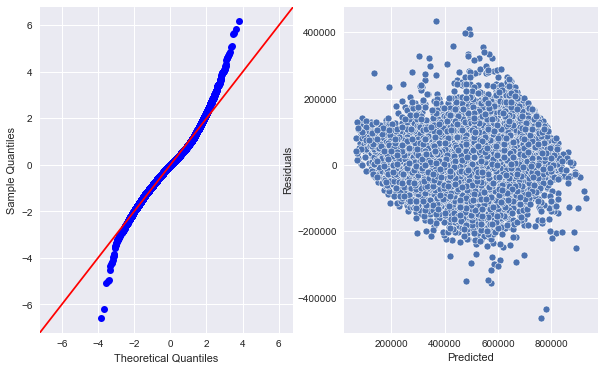

In [4803]:
model = modeling(df_scaled)

In [4804]:
df_scaled.drop(["waterfront", "has_basement"], axis=1, inplace=True)

## Interpret

Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

In [4805]:
coefficients = model.params.sort_values().to_frame('coefficients')
coefficients['abs'] = coefficients['coefficients'].abs()
coefficients.sort_values('abs', ascending=False, inplace=True)

In [4806]:
coefficients[~coefficients.index.str.startswith('zipcode')]

,coefficients,abs
Intercept,2.647292e+05,2.647292e+05
sqft_above,6.366172e+04,6.366172e+04
grade,3.041832e+04,3.041832e+04
sqft_basement,2.113136e+04,2.113136e+04
yr_built,-1.736469e+04,1.736469e+04
sqft_living15,1.690048e+04,1.690048e+04
condition,1.317124e+04,1.317124e+04
has_basement[T.True],6.867278e+03,6.867278e+03
bathrooms,6.750996e+03,6.750996e+03
sqft_lot,5.678813e+03,5.678813e+03


We see that the top 3 parameters that affect the sale price of homes are has_basement, sqft_above and grade.
We shall draw conclusions from the these three parameters.

In [4807]:
sqft_above_df = outliers_price.loc[:, ["sqft_above", "price"]]
sqft_above_df = sqft_above_df.groupby("sqft_above").mean().reset_index()
sqft_above_df

,sqft_above,price
0,480,119900.0
1,490,280300.0
2,560,249900.0
3,570,230000.0
4,580,279475.0
...,...,...
653,4073,510000.0
654,4140,720000.0
655,4180,673200.0
656,4190,460000.0


In [4808]:
sqft_above_df["sqft_above"].max()

4210

In [4809]:
sqft_above_df["sqft_above"].min()

480

### Data Visualization

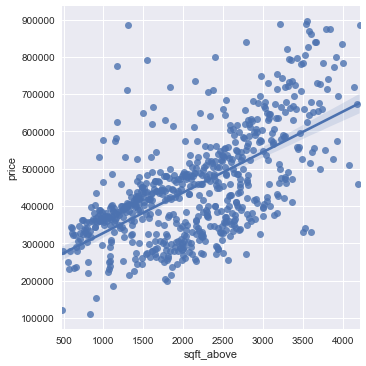

In [4810]:
sns.lmplot(x="sqft_above", y="price", data=sqft_above_df)

In [4811]:
def types_of_houses(feature):
    if feature > 0 and feature < 1000:
        return "0-1000 sqft"
    elif feature > 1000 and feature < 2000:
        return "1000-2000 sqft"
    elif feature > 2000 and feature < 3000:
        return "2000-3000 sqft"
    elif feature > 3000 and feature < 4000:
        return "3000-4000 sqft"
    elif feature > 4000 and feature < 5000:
        return "4000-5000 sqft"
    else:
        return "5000-6000 sqft"

In [4813]:
sqft_above_df["category"] = sqft_above_df["sqft_above"].map(lambda x: types_of_houses(x))

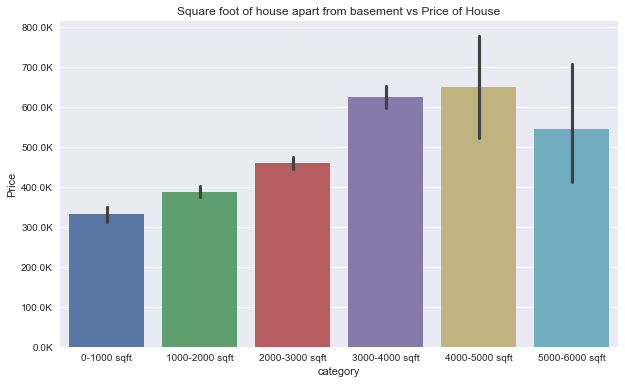

In [4814]:
fig, ax = plt.subplots(figsize=(10, 6))
order = ["0-1000 sqft", "1000-2000 sqft", "2000-3000 sqft", "3000-4000 sqft", "4000-5000 sqft", "5000-6000 sqft"]
sns.barplot(x="category", y="price", data=sqft_above_df, order=order, ci=95, ax=ax)
ax.set_label("SQFT above ground")
ax.set_ylabel("Price")
ax.set_title("Square foot of house apart from basement vs Price of House")
ax.yaxis.set_major_formatter(FuncFormatter(thousands))
plt.show()

In [4815]:
mean_price_per_category = sqft_above_df.groupby("category")["price"].mean().reset_index()
mean_price_per_category

,category,price
0,0-1000 sqft,331466.561171
1,1000-2000 sqft,387755.069363
2,2000-3000 sqft,458789.411111
3,3000-4000 sqft,624586.888098
4,4000-5000 sqft,649588.800000
5,5000-6000 sqft,545343.019294


In [4816]:
outliers_price["has_basement"] = outliers_price["has_basement"].astype("bool")

<ipython-input-4816-31a9642a2216>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_price["has_basement"] = outliers_price["has_basement"].astype("bool")


<Figure size 1080x576 with 0 Axes>

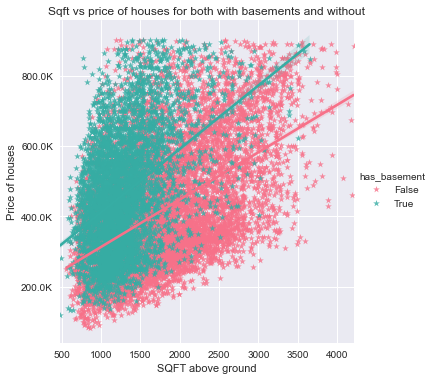

In [4857]:
plt.figure(figsize=(15, 8))
sns.lmplot(x="sqft_above", y="price", hue="has_basement", data=outliers_price,
           markers="*", palette="husl")
ax = plt.gca()
ax.set_xlabel("SQFT above ground")
ax.set_ylabel("Price of houses")
ax.set_title("Sqft vs price of houses for both with basements and without")
ax.yaxis.set_major_formatter(FuncFormatter(thousands))

In [4847]:
df_grade = outliers_price.loc[:, ["grade", "price"]]
df_grade

,grade,price
0,7,221900.0
1,7,538000.0
2,6,180000.0
3,7,604000.0
4,8,510000.0
...,...,...
21592,8,360000.0
21593,8,400000.0
21594,7,402101.0
21595,8,400000.0


In [4848]:
df_grade_sqft = pd.concat([df_grade, outliers_price["sqft_above"]], axis=1)
df_grade_sqft

,grade,price,sqft_above
0,7,221900.0,1180
1,7,538000.0,2170
2,6,180000.0,770
3,7,604000.0,1050
4,8,510000.0,1680
...,...,...,...
21592,8,360000.0,1530
21593,8,400000.0,2310
21594,7,402101.0,1020
21595,8,400000.0,1600


In [4849]:
def grade_score(feature):
    if feature < 7:
        return "Low Score"
    elif feature > 8: 
        return "High Score"
    else:
        return "Average Score"

In [4850]:
df_grade_sqft["categories"] = df_grade_sqft["grade"].map(lambda x: grade_score(x))

In [4851]:
df_grade_group = df_grade_sqft.groupby("categories")["price"].mean().reset_index()
df_grade_group

,categories,price
0,Average Score,425442.880252
1,High Score,632470.022140
2,Low Score,292656.627030


Text(0.5, 1.0, 'Grade vs Price of houses in KC')

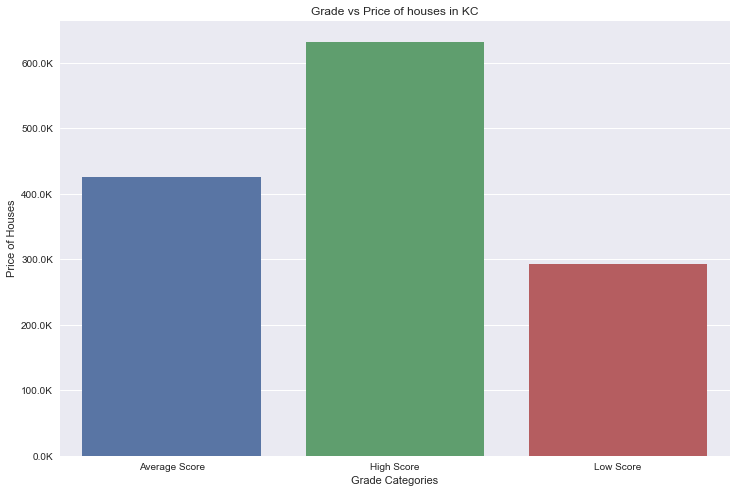

In [4852]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x="categories", y="price", data=df_grade_group, ax=ax)
ax.yaxis.set_major_formatter(FuncFormatter(thousands))
ax.set_xlabel("Grade Categories")
ax.set_ylabel("Price of Houses")
ax.set_title("Grade vs Price of houses in KC")

<Figure size 1080x576 with 0 Axes>

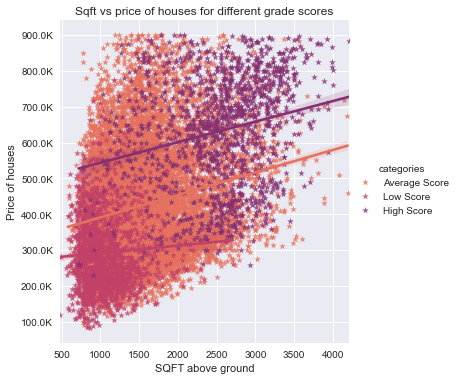

In [4858]:
plt.figure(figsize=(15, 8))
sns.lmplot(x="sqft_above", y="price", hue="categories", data= df_grade_sqft,
           markers="*", palette = "flare")
ax = plt.gca()
ax.set_xlabel("SQFT above ground")
ax.set_ylabel("Price of houses")
ax.set_title("Sqft vs price of houses for different grade scores")
ax.yaxis.set_major_formatter(FuncFormatter(thousands))

## Conclusion and Recommendation

Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

***
### The following conclusions can be drawn from our analysis:
- The area above the basement is key when purchasing houses. The main area to focus is on purchasing houses with adequate amount of area excluding the basement.
- Basements also do play a key role in valuing houses in King County. If a house has a basement, it tends to have more value.
- Grading done according to the KC grading system plays a significant role in valuing houses in KC.
***

### Here are the recommendations based on our findings:
***
>- Firstly, we recommend purchasing houses with 4000-5000 sqft area above basement, as they hold the most value.
>- Secondly, purchasing houses with 4000-5000 sqft and having a basement will hold tremendous value in the future.
>- Lastly, Highly scored houses (according to KC grading system) but not the largest (in terms of sqft above ground) will be profitable while selling the houses to future house owners.
***